<a href="https://colab.research.google.com/github/tejabalu/udub/blob/master/Copy_of_Technin510_S2_What_is_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technology Innovation 510
## Introduction to Data Science Methods: Data Science and Visualization

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

<br>

---

<br>

Today, we'll be continuing our discussion of AI/DS/ML with our part II: Data Science (and a focus in Visualization)🎉

<br>

---

# Preparing Notebook for Demos

## Importing Packages

Once we have our packages installed, we need to import them. We can also import packages that are pre-installed in the Colab environment.

In [ ]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
pd.options.display.max_rows = 999
pd.set_option('display.max_colwidth', None) #expand the column
sns.set() #set default seaborn theme

## Importing Data

We also have the ability to import data, and use it elsewhere in the notebook 📝!

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
  "technology_explorers/main/assets/imdb_movies.csv")

# converting years to numbers for easy conditionals
df['year'] = pd.to_numeric(df['year'], errors='coerce')
# df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 📊 What is Data Science?

### The Emergence of Data Science

Data Science is a broad field, and depending on who you talk to, it can mean different things. In summary, many independent scientific fields began accumulating large amounts of data. At the UW in particular, these were dominated by the astronomy and oceanography departments. Folks began to realize that they needed a particular set of tools to handle large amounts of data. This culminated in the [eScience studio](https://escience.washington.edu/), which began to service the data needs of many departments on campus.

Today, data science not only has to do with large amounts of data, but refers generally to tools that allow us to work with a variety of data types. Because of this, machine learning is a tool within data science. But there are other tools apart from machine learning that make up the data science ecosystem. Some of them are:

* data visualization
* databases 
* statistics

You could argue for others as well (algorithms, web servers, programming, etc.), but these are the formally accepted areas. We can borrow from Drew Conway's Data Science Venn Diagram, first published on his blog in September 2010, to make further sense of this:

<p align="center">
<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/Data_Science_VD.png"></img>

#### 💭 1

Let's see if we can converge on a definition of Data Science. Talk to your neighbor, convene together, then let's share. Do this at 2 different levels:

How would you explain Data Science to:
1. your grandmother
2. a young professional

You may find these articles useful:

* from Oracle
    * [A business pov on DS](https://www.oracle.com/data-science/what-is-data-science/)

    * [An implementation pov on DS](https://www.oracle.com/a/ocom/docs/data-science-lifecycle-ebook.pdf)

* a more technical *cough* better *cough* discussion on DS from Software Carpentry:
    * [A research pov on DS](https://software-carpentry.org/blog/2017/12/assessing-data-science.html)
    * [The minues from that meeting](https://github.com/carpentries/assessment/blob/main/assessment-network/minutes/2017-11-15.md)

#### 💬 1

I'll write these down, let's see if we can all agree on a precise definition

### Saying Stuff About Data (Statistics)

When we're talking about statistics, we're really talking about data story telling. Statistics is at the C O R E of data science, really. Without a basic knowledge of statistics it'll be hard for you to construct your data narratives and have them hold water. 

Let's start with some simple examples of data story telling, and use these to generate our own thoughts on the matter.

#### Anscombe's Quartet

There's a very famous anomaly in DS caled Anscombe's quartet. Observe the following data

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds1.png"></img>

We can construct this in python and confirm the summary statistics ourselves

In [ ]:
df = pd.read_excel("https://github.com/wesleybeckner/technology_explorers/blob"\
                   "/main/assets/data_science/anscombes.xlsx?raw=true",
              header=[0,1]) #header represents the number of headers the table has
df

I         II       III         IV       
     X      Y   X     Y   X      Y   X      Y
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89

In [ ]:
df.reindex()

I         II       III         IV       
     X      Y   X     Y   X      Y   X      Y
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89

In [ ]:
df.loc[0].value_counts()

10.00    3
9.14     1
6.58     1
8.00     1
7.46     1
8.04     1
Name: 0, dtype: int64

We can calculate the mean/variance of X and Y for samples I, II, III, and IV

In [ ]:
df.shape[0]

11

In [ ]:
df.mean(axis=0)

I    X    9.000000
     Y    7.500909
II   X    9.000000
     Y    7.500909
III  X    9.000000
     Y    7.500000
IV   X    9.000000
     Y    7.500909
dtype: float64

In [ ]:
# do we remember the relationship between standard deviation and variance?
df.std(axis=0)**2 #variance = sq of std dev

I    X    11.000000
     Y     4.127269
II   X    11.000000
     Y     4.127629
III  X    11.000000
     Y     4.122620
IV   X    11.000000
     Y     4.123249
dtype: float64

For the line of best fit, recall the equation for a linear relationship between x and y:

$$y(x)= m\cdot x + b$$ 

In [ ]:
df.loc[0]
df.iloc[0]
# iloc gets rows with particular int positions, while loc gets pos with lables.

I    X    10.00
     Y     8.04
II   X    10.00
     Y     9.14
III  X    10.00
     Y     7.46
IV   X     8.00
     Y     6.58
Name: 0, dtype: float64

In [ ]:
sets = ['I', 'II', 'III', 'IV']
for i in sets:
  y = LinearRegression().fit(df[i]['X'].values.reshape(df.shape[0], 1), df[i]['Y'])
  print(df[i]['X'].values.reshape(11,1))



























[[10]
 [ 8]
 [13]
 [ 9]
 [11]
 [14]
 [ 6]
 [ 4]
 [12]
 [ 7]
 [ 5]]
[[10]
 [ 8]
 [13]
 [ 9]
 [11]
 [14]
 [ 6]
 [ 4]
 [12]
 [ 7]
 [ 5]]
[[10]
 [ 8]
 [13]
 [ 9]
 [11]
 [14]
 [ 6]
 [ 4]
 [12]
 [ 7]
 [ 5]]
[[ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [ 8]
 [19]
 [ 8]
 [ 8]
 [ 8]]


In [ ]:
sets =["I", "II", "III", "IV"]

for i in sets:
  y = LinearRegression().fit(df[i]['X'].values.reshape(df.shape[0], 1), df[i]['Y'])
  # print(y.coef_[0], y.intercept_)
  print("linear regression line {:.3f}X+{:.2f}".format(y.coef_[0], y.intercept_))

linear regression line 0.500X+3.00
linear regression line 0.500X+3.00
linear regression line 0.500X+3.00
linear regression line 0.500X+3.00


In [ ]:
# model = LinearRegression()
# sets = ['I', 'II', 'III', 'IV']
# for data in sets:
#   model.fit(df[data]['X'].values.reshape(11,1),
#             df[data]['Y'])
#   print("Linear Regression Line: Y = {:.2f}X + {:.2f}".format(model.coef_[0], model.intercept_))

$R^2$ measures the goodness of fit. $R^2$ is generally defined as the ratio of the total sum of squares $SS_{\sf tot} $ to the residual sum of squares $SS_{\sf res} $:

The Residual Sum of Squares is defined as:

$$SS_{\sf res}=\sum_{i=1}^{N} \left(y^{\sf exact}_i - y^{\sf calc}_i\right)^2$$

We now define the total sum of squares, a measure of the total variance in the data:

$$SS_{\sf tot}=\sum_{i=1}^{N} \left(y^{\sf exact}_i-\bar{y}\right)^2$$

The $R^2$ tells us how much of the variance of the data, is captured by the model we created:

$$R^2 = 1 - {SS_{\sf res}\over SS_{\sf tot}}$$

In the first equation, $\bar{y}=\sum_i y^{\sf exact}_i/N$ is the average value of y for $N$ points. The best value of $R^2$ is 1 but it can also take a negative value if the error is large.

In [ ]:
for i in sets:
  # ssr
  ssr = np.sum((df[i]['Y'] - y.predict(df[i]['X'].values.reshape(-1,1)))**2)
  print(("{:.2f}").format(ssr))
  sst = np.sum((df[i]['Y']-df[i]['Y'].mean())**2)
  r2 = 1 - (ssr/sst)
  print ("{:.2f}".format(r2))

13.76
0.67
13.78
0.67
13.76
0.67
13.74
0.67


In [ ]:
# for data in sets:
#   # calc the ssr
#   ssr = np.sum((df[data]['Y'] - 
#                 model.predict(df[data]['X'].values.reshape(-1,1)))**2)
#   print(ssr)
#   # calc the sst
#   sst = np.sum((df[data]['Y'] - 
#                 df[data]['Y'].mean())**2)

#   # calc the r2
#   r2 = 1 - (ssr/sst)
#   print("R2 = {:.2f}".format(r2))

# df

As we can see, everything checks out. The summary statistics are all the same!

Can we answer the following:

> What dataset is best described by the line of best fit?

We will revisit this question when we talk about data visualization

#### Taxonomy of Data Types

Another important topic in data science, is simply what kind of data we are working with. This will help us decide what kind of models to build, as well as how to visualize our data, and perhaps store it as well.

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds2.png"></img>

#### 💬 2

What are some examples of the different datatypes we can think of?

### Data Visualization

Data visualization, like it sounds, has to do with how we display and communicate information. At the end of the day, your findings and algorithms aren't worth very much if we can't share them with others. One of the leading thinkers in the visual display of information is Edward Tufte
* [Tufte's Principles](https://thedoublethink.com/tuftes-principles-for-visualizing-quantitative-information/)
* [Data-ink](https://infovis-wiki.net/wiki/Data-Ink_Ratio)
* [Wiki](https://en.wikipedia.org/wiki/Edward_Tufte)

#### Guiding Principles of Data Visualization

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds3.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds9.gif"></img>

Another topic Tufte discusses is Data Density. Apart from ink, we should also consider the entire area dedicated to the graphic. That area should be as condensed as possible without removing ledgibility/readability.


<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds7.png"></img>

wattenberg and Viegas visualization

In [ ]:
%%HTML
<video width="640" height="580" controls>
  <source src="https://github.com/wesleybeckner/technology_explorers/blob/main/assets/data_science/ds4.mp4?raw=true" type="video/mp4">
</video>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds6.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds4.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds5.png"></img>


[Color blindness](https://www.colourblindawareness.org/colour-blindness/) is prevalent, and something we should consider when choosing colors in our visual displays

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds8.png"></img>


<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds9.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds10.png"></img>


<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds11.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds12.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds13.png"></img>

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds14.jpg"></img>

#### Visualization Un-Examples

**Unexample 1**

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds15.jpg"></img>

**Unexample 2**

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds19.png"></img>

**Unexample 3**

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds17.png"></img>

**Unexample 4**

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds18.png"></img>

#### 💭 3

Find an example of an interactive data visualization online. Here's one I [found](https://www.migrationpolicy.org/programs/data-hub/charts/us-immigrant-population-state-and-county) that I though was quite interesting!

#### 💬 3

Swap visualization links with your neighbor. What do you think could be improved about each one?

#### Back to Anscombe's Quartet

<p align=center>
<img src="https://raw.githubusercontent.com/wesleybeckner/technology_explorers/main/assets/data_science/ds20.png"></img>

### Revisiting our A.I. movie data

Let's revisit our imdb dataset from last week.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
  "technology_explorers/main/assets/imdb_movies.csv")

# converting years to numbers for easy conditionals
df['year'] = pd.to_numeric(df['year'], errors='coerce')

df.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894.0,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey Depew",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Bella Cola, Will Coyne, Sam Crewes, Jack Ennis, John Forde, Vera Linden, Mr. Marshall, Mr. McKenzie, Frank Mills, Ollie Wilson",True story of notorious Australian outlaw Ned Kelly (1855-80).,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


In [ ]:

df.loc[(df['description'].str.contains('artificial intelligence|a\.i\.|robot', 
                                       na=False))][['original_title', 'year', 'description']][:10]

,original_title,year,description
1683,Son of a Sailor,1933.0,"A smooth-talking sailor looking for a quick date meets the granddaughter of an admiral and finds himself in a house full of top Navy officers, along with a couple of spies interested in plans for a new robot-controlled flight system."
3339,The Middleton Family at the New York World's Fair,1939.0,"The Middleton family visits the 1939 New York World's Fair and witnesses the advent of the future, encountering robots and dishwashers for the first time."
3846,Emergency Landing,1941.0,"A test pilot and his weather observer develop a ""robot"" control so airplanes can be flown without pilots, but enemy agents get wind of it and try to steal it or destroy it."
4122,Cairo,1942.0,Reporter Homer Smith accidentally draws Marcia Warren into his mission to stop Nazis from bombing Allied Convoys with robot-planes.
6274,The Perfect Woman,1949.0,"In need of cash, Roger Cavendish and his valet take a job escorting the perfect woman for a night on the town. She is in fact the robotic creation of Professor Belman, but it turns out ..."
7936,Devil Girl from Mars,1954.0,"An uptight, leather-clad female alien, armed with a ray gun and accompanied by a menacing robot, comes to Earth to collect Earth's men as breeding stock."
7977,Gog,1954.0,"A security agent investigates sabotage and murder at a secret underground laboratory, home of two experimental robots."
8155,Target Earth,1954.0,Giant robots from Venus invade Chicago. Stranded in the deserted city are strangers Frank and Nora.
8173,Tobor the Great,1954.0,"A young boy-genius befriends his grandfather's robot, designed as a test pilot for space travel and coveted by foreign spies."
9047,Chikyû Bôeigun,1957.0,"Shortly after a giant robot destroys a village, aliens from outer space arrive offering friendship. Will the people of Earth tie these two events together?"


In [ ]:
filter = df['description'].str.contains('artificial intelligence|a\.i\.|robot', na = False)
df.loc[filter][['title', 'original_title', 'description']].head(5)

,title,original_title,description
1683,Son of a Sailor,Son of a Sailor,"A smooth-talking sailor looking for a quick date meets the granddaughter of an admiral and finds himself in a house full of top Navy officers, along with a couple of spies interested in plans for a new robot-controlled flight system."
3339,The Middleton Family at the New York World's Fair,The Middleton Family at the New York World's Fair,"The Middleton family visits the 1939 New York World's Fair and witnesses the advent of the future, encountering robots and dishwashers for the first time."
3846,Il segreto del p 22,Emergency Landing,"A test pilot and his weather observer develop a ""robot"" control so airplanes can be flown without pilots, but enemy agents get wind of it and try to steal it or destroy it."
4122,Avventura al Cairo,Cairo,Reporter Homer Smith accidentally draws Marcia Warren into his mission to stop Nazis from bombing Allied Convoys with robot-planes.
6274,The Perfect Woman,The Perfect Woman,"In need of cash, Roger Cavendish and his valet take a job escorting the perfect woman for a night on the town. She is in fact the robotic creation of Professor Belman, but it turns out ..."


Let's create a visualization that helps answer the question: 

> What is the popularity of AI movies by year?"

#### 💬 4

What are some potential issues with the following plot?

In [ ]:
# practice
aimovies = df.loc[df['description'].str.contains('artificial intelligence|a\.i\.|robot', na = False)]
aimovies[['title', 'description']]
aimoviesyear = aimovies.groupby('year').count()
aimoviesyear['title'].values

array([ 1,  1,  1,  1,  1,  1,  4,  2,  2,  1,  2,  1,  1,  3,  2,  1,  2,
        1,  1,  1,  2,  1,  4,  1,  2,  1,  1,  2,  1,  9,  6,  1,  3,  2,
        1,  5,  4,  4,  4,  1,  2,  3,  4,  2,  3,  4,  5,  3,  1,  2,  7,
        5,  7,  4,  8,  9,  6,  7, 10, 12, 11,  3])

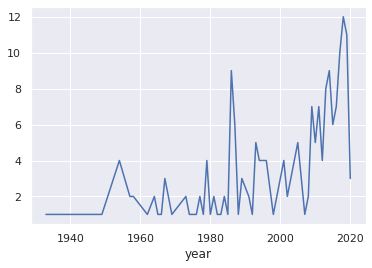

In [ ]:
fig, ax = plt.subplots()
aimoviesyear['title'].plot()

In [ ]:
aimovies = df.loc[df["description"].str.contains('artificial intelligence|a\.i\.|robot', na=False)]
aimovies.shape
# aimovies.groupby('year').count()["imdb_title_id"]

(203, 22)

In [ ]:
ai_movies = df.loc[(df['description'].str.contains('artificial intelligence|a\.i\.|robot', 
                                       na=False))]

ai_movies.shape


(203, 22)

Text(0, 0.5, 'number of movies')

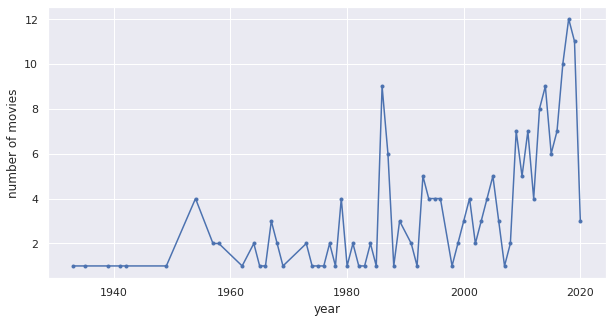

In [ ]:
byyear = aimovies.groupby('year').count()["imdb_title_id"]
# byyear

# aimovies['year'].value_counts()
# value counts arrangegs the data in descending order, .count can be done on dataframes and not valuecounts 
# value counts have to be used when you want to find the ferquency of a series. count has to be used to count the no. of valied filter values 

fig, ax = plt.subplots(figsize = (10,5))
byyear.plot(marker = ".", ax = ax) #ax=ax is saying that the x axis have to have the same values?idk
ax.set_ylabel("number of movies")

Text(0, 0.5, 'number of movies')

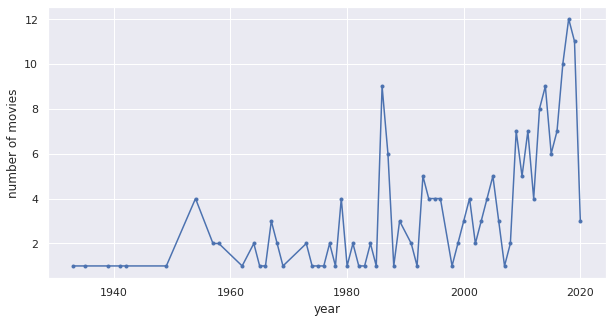

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ai_movies.groupby('year').count()['imdb_title_id'].plot(marker='.', ax=ax)
ax.set_ylabel("number of movies")

It looks like the popularity is increasing, doesn't it? But is that fair to say if we do not consider the total number of movies in the database each year?

Let's say we're curious about the year 1986 and what countries contributed to the spike in movies. How would we *filter* for year 1986, then *select* country and perform a count *operation*? Remember the sequence **Select ➡️ filter ➡️ operate**

In [ ]:
# practice
aimovies[['year', 'title', 'country']].head(5)
aimovies.loc[aimovies['year']==1986][['country']].value_counts()

country             
USA                     3
Japan                   2
USA, Spain              1
USA, Japan              1
Poland, Soviet Union    1
Canada                  1
dtype: int64

In [ ]:
ai_movies.loc[ai_movies['year'] == 1986][['country']].value_counts()

country             
USA                     3
Japan                   2
USA, Spain              1
USA, Japan              1
Poland, Soviet Union    1
Canada                  1
dtype: int64

Looks like a good year for US-Japan movie making. How can we look into the role of different countries in AI movie making?

> in the following, pandas doesn't have the ability to color according to a categorical column, out of the box. So I switch over to seaborn. For more exercises with seaborn visit [JVDP's chapter on the subject](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)

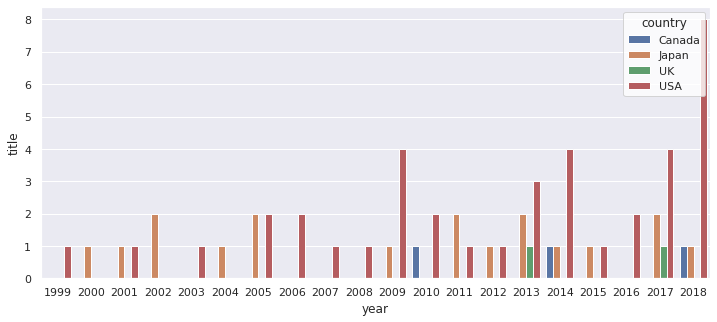

In [ ]:
bycountry = ai_movies.groupby('country').filter(lambda x: (x.count()>=5).any())
bycountryyear = bycountry.groupby(['country','year']).count()
graph = bycountryyear.reset_index()


fig, ax = plt.subplots(figsize = (12,5))

with sns.axes_style("whitegrid"):
  g = sns.barplot(data=graph, x = 'year', y='title', hue='country', order=range(1999,2019))

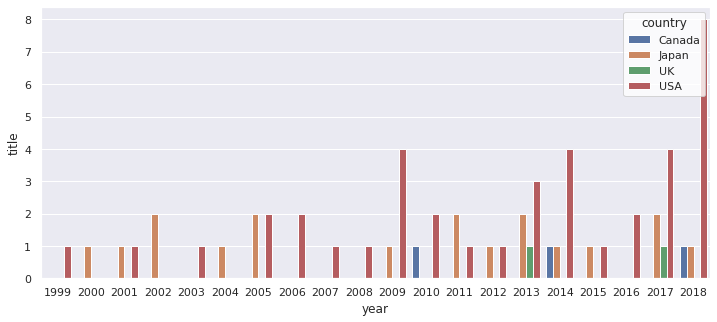

In [ ]:
fig, ax = plt.subplots(figsize = (12,5))

bycountry = ai_movies.groupby(['country']).filter(lambda x: (x.count() >= 5).any()).\
                      groupby(['country', 'year']).apply(lambda x: (x.count()))['title'].reset_index()

with sns.axes_style("whitegrid"):
  g = sns.barplot(data=bycountry, x = 'year', y='title', hue='country', order=range(1999,2019))

fig, ax = plt.subplots(figsize=(12,5))
by_country = ai_movies.groupby(['country']).filter(lambda x: (x.count() >= 5).any()).\
          groupby(['country', 'year']).apply(lambda x: x.count())[['title']].reset_index()






with sns.axes_style('white'):
    g = sns.barplot(data=by_country, x="year", hue='country', y='title', ax=ax, order=range(1999, 2019))
ax.set_ylabel('Number of Films')

For the last 20 years we can see that U.S./Japan have dominated the A.I. movie market

# In-Class Exercises

Create visualizations that help a user answer the following questions:

## 🐍 Exercise 1: Visualizing Fractions

1. Of all the movie data, which top 10 countries have the highest fraction of AI movies?
2. Are there more movies about AI before or after 1986?

In [ ]:
# Cell for 1.1


df_totmovies = df.groupby(['country']).count()



df_aimovies = df.groupby(['country'])['description'].apply(lambda x: x.loc[x.str.contains('artificial intelligence|a\.i\.|robot', na=False)].count())


In [ ]:
df_aimovies.reset_index()

,country,description
0,"Afghanistan, France",0
1,"Afghanistan, France, Germany, UK",0
2,"Afghanistan, Iran",0
3,"Afghanistan, Ireland, Japan, Iran, Netherlands",0
4,Albania,0
...,...,...
4902,"Yugoslavia, USA",0
4903,"Yugoslavia, USA, Liechtenstein",0
4904,"Yugoslavia, West Germany",0
4905,"Zambia, Sweden",0


In [ ]:
# Cell for 1.2

ai_movies = df.loc[(df['description'].str.contains('artificial intelligence|a\.i\.|robot', na=False))]

before = ai_movies.loc[ai_movies['year']<=1986]
before.shape

after = ai_movies.loc[ai_movies['year']>1986]
after.shape, before.shape
ai_movies.shape[0], after.shape[0], before.shape[0]

## 🐍 Exercise 2: Operating on NumPy Arrays

the following arrays, x, y, and z, contain the respective locations of an objext in 3-dimensional space with respect to time. 

1. Return the euclidian distance between the points in x, y, and z
2. Plot the euclidian distance as blue squares if the distance is greater than 1 and as red stars otherwise in a scatterplot of distance vs time

```
np.random.seed(42)
x = np.random.randn(10)
y = np.random.randn(10)
z = np.random.randn(10)
```

In [ ]:
np.random.seed(42)
x = np.random.randn(10)
y = np.random.randn(10)
z = np.random.randn(10)

In [ ]:
# Cell for 2.1
dist = np.sqrt(x**2 + y**2 + z**2)
dist

In [ ]:
# Cell for 2.2


plt.plot(dist, 'ro')